# **菊安酱与菜菜的Python机器学习可视化**

## 第一期 关联图 (1)

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

2018年12月，大佬博主Selva Prabhakaran在自己运营的机器学习网站MachineLearning Plus上发布了博文：Python可视化50图 <br>
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

### 博文非常优秀，但是同时.....
1 代码有一定难度，属于可视化进阶内容，但没有任何注解<br>
2 没有任何数据探索<br>
3 没有任何图形解释<br>
4 内容过多，一个人难以从头看到尾，好不容易诞生的一篇干货文章，会逐渐沦为微信收藏夹中又一个被忘记的对象

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/crying.PNG" />

## **菊安酱和菜菜不希望看到这篇优秀文章被浪费掉！**
### 在接下来的8周之内，我们将会带领你一起遍历50图，每周直播+完整版更新，不怕没人带没动力~！
我们将会给你：<br>
1. 有逻辑的数据探索<br>
2. 完整的代码，模块和包的解读(ipy当然是会给你们的啦(￣▽￣))<br>
3. 绘图参数的含义和调试<br>
4. <font color=red>**读图，根据数据解读出图像中有用的信息**</font><br>
5. 完整的Python可视化流程<br>
6. 更改原始代码中出现的一些bug，*直播也许会随机掉落的小题目*<br>

而你需要：
1. 熟悉Python基础，包括Pandas和Numpy库
2. 熟悉数据相关的基本概念——比如，什么是特征，什么是标签？

*我们可能会使用机器学习中的一些基本技巧来进行数据的探索

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## <center>每周三晚上8点直播1小时，完整版2小时周日上线~</center>
## <center>单数周菜菜直播，双数周菊安酱直播，哔哩哔哩与peixun.net同步开启</center>

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## **00 安装库，配置环境**

在Python中进行可视化，我们需要的是这些库：<br>
1. **matplotlib**：python中自带的，也是最常用的可视化工具包，在Jupyter中甚至可以找到matplotlib的网站<br>
2. **seaborn**：python中可视化的新起之秀，致力于统计数据可视化<br>
3. **brewer2mpl**：brewer2mpl是一个专供python使用的，用于访问colorbrewer2色谱的工具，colorbrewer2是一个专业颜色顾问公司

#### matplotlib

> 通常来说，如果我们是使用anaconda安装的python，那matplotlib是自带的<br>
> 如果你发现你的python环境中没有matplotlib，那你可以使用以下命令先安装pip，然后从pip中安装matplotlib：<br>

In [ ]:
#python -m pip install -U pip
#python -m pip install -U matplotlib

> 你可以通过在Jupyter中运行 print(matplotlib.\_\_version\_\_) 来查看你现有的matplotlib版本

In [1]:
import matplotlib as mlp
print(mlp.__version__)

3.0.3


> 建议都更新成和菜菜一样，最少也需要3.0.1以上 <br>
> 如果你的版本不足，你可以使用下面的代码来更新你的版本，注意conda和pip不要混装

In [ ]:
#%%cmd
#conda update matplotlib
#或者
#pip install --upgrade matplotlib

#### seaborn

> seaborn是需要自己安装的。如果不是anaconda自带，建议使用pip安装

In [ ]:
#%%cmd
#pip install seaborn

In [2]:
import seaborn as sns
print(sns.__version__)

0.9.0


> seaborn要求必须0.9.0以上，否则代码会报错，不足0.9.0的大家可以使用以下代码进行升级

In [7]:
#%%cmd
#pip install --upgrade seaborn

#### brewer2mpl

> 同样也需要自己安装，使用以下代码：

In [8]:
#%%cmd
#pip install brewer2mpl

> 不必过于在意版本，通常来说都是直接安装成最新版

#### **菜菜所使用的版本**：

In [3]:
import sys
print(sns.__version__)
print(mlp.__version__)

#Python版本
sys.version

0.9.0
3.0.3


'3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]'

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## **第一章 关联图 Correlation**

关联图是查找两个事物之间关系的图像，它能够为我们展示出一个事物随着另一个事物的变化如何变化<br>
典型的关联图有：折线图，散点图，相关矩阵……

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E5%85%B3%E8%81%94%E5%9B%BE%E5%85%B8%E5%9E%8B.PNG" align="center" />

### 我们什么时候会需要关联图呢？
1. 数据报告 & 学术研究：<br>
>展示趋势：比如产品销量随着时间如何变化，智力水平随着教育程度如何变化等<br>
>展现状态：不同年龄的客户的成交率，不同生产成本对应的生产员工技能要求
2. 数据探索 & 数据解读：<br>
>探索数据关系，帮助了解事实，推动研究<br>
3. 统计学 & 机器学习：<br>
> 探索数据关系，指导数据预处理和模型选择<br>

### 01/50 散点图

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E6%95%A3%E7%82%B9%E5%9B%BE.PNG" align="center" />

横坐标：面积大小<br>
总坐标：总人口<br>
图例：暂时看不出是什么总而言之看起来是类型，一种类型一个颜色

### **我们的目标是：绘制出这张图，并且利用数据解读图内的信息**

### 1. 导入需要的绘图库

In [53]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#如果你在使用Jupyter Notebook，你会需要这样一句命令来让你的图像显示

### 2. 先来认识一下绘制散点图的函数

#### **plt.scatter()**

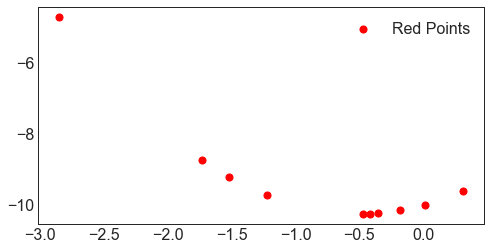

In [54]:
#绘制超简单的散点图：变量x1与x2的关系

#定义数据
x1 = np.random.randn(10) #取随机数
x2 = x1 + x1**2 - 10

#确定画布 - 当只有一个图的时候，不是必须存在
plt.figure(figsize=(8,4))

#绘图
plt.scatter(x1,x2 #横坐标，纵坐标
            ,s=50 #数据点的尺寸大小
            ,c="red" #数据点的颜色
            ,label = "Red Points"
           )
#装饰图形
plt.legend() #显示图例

plt.show() #让图形显示

In [55]:
x1

array([ 0.31058785, -1.73296465, -0.35663516, -2.85110697, -0.17974639,
       -1.22414618, -1.52112421, -0.41787929,  0.01156326, -0.47224511])

In [56]:
x2

array([ -9.59294733,  -8.72979818, -10.22944652,  -4.72229602,
       -10.14743763,  -9.72561231,  -9.20730535, -10.24325619,
        -9.98830303, -10.24922967])

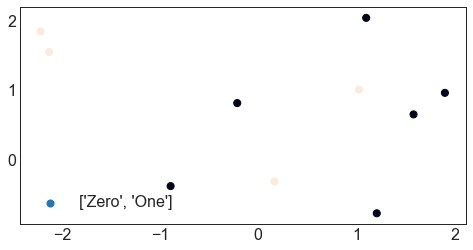

In [57]:
#来试试看一个更加稍微难一些的：除了两列X之外，还有标签y的存在
#在机器学习中，我们经常有使用标签y作为颜色来观察两种类别的分布的需求

X = np.random.randn(10,2) #10行，2列的数据集
y = np.array([0,0,1,1,0,1,0,1,0,0])

plt.figure(figsize=(8,4))

plt.scatter(X[:,0],X[:,1] #横坐标，纵坐标
            ,s=50
            ,c=y #分类能够被可视化
            ,label = ["Zero","One"]
           )

plt.legend()
plt.show()

In [58]:
X

array([[ 1.20603652, -0.77945105],
       [-0.89226683, -0.38763205],
       [-2.21484794,  1.84263114],
       [ 1.0258888 ,  1.00460164],
       [ 1.09811262,  2.0383907 ],
       [-2.12835881,  1.54622619],
       [ 1.89934612,  0.9571863 ],
       [ 0.16464519, -0.31881611],
       [-0.21424534,  0.80973075],
       [ 1.58023304,  0.64646816]])

In [59]:
X[:,0]

array([ 1.20603652, -0.89226683, -2.21484794,  1.0258888 ,  1.09811262,
       -2.12835881,  1.89934612,  0.16464519, -0.21424534,  1.58023304])

In [60]:
X[:,1]

array([-0.77945105, -0.38763205,  1.84263114,  1.00460164,  2.0383907 ,
        1.54622619,  0.9571863 , -0.31881611,  0.80973075,  0.64646816])

In [61]:
y

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

#### 【核心知识点】可视化分类标签时的图例
你是否注意到了？<br>
如果我们希望显示多种颜色的散点图，并且这个颜色是我们的标签y所代表的分类，那我们**无法**让散点图显示分别代表不同颜色的图例<br>
那我们应该怎么办呢？

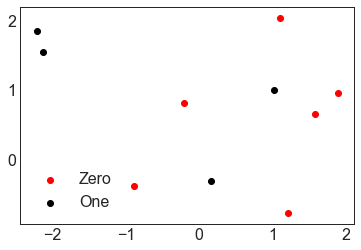

In [62]:
colors = ["red","black"] #确立颜色列表
labels = ["Zero","One"] #确立标签的类别列表

for i in range(X.shape[1]):
    plt.scatter(X[y==i,0],
               X[y==i,1],
               c=colors[i],
               label = labels[i])

#在标签中存在几种类别，我们就需要循环几次，一次画一个颜色的点

plt.legend()
plt.show()

In [63]:
X #一类标签，画一类

array([[ 1.20603652, -0.77945105],
       [-0.89226683, -0.38763205],
       [-2.21484794,  1.84263114],
       [ 1.0258888 ,  1.00460164],
       [ 1.09811262,  2.0383907 ],
       [-2.12835881,  1.54622619],
       [ 1.89934612,  0.9571863 ],
       [ 0.16464519, -0.31881611],
       [-0.21424534,  0.80973075],
       [ 1.58023304,  0.64646816]])

In [64]:
X[y == 0]

array([[ 1.20603652, -0.77945105],
       [-0.89226683, -0.38763205],
       [ 1.09811262,  2.0383907 ],
       [ 1.89934612,  0.9571863 ],
       [-0.21424534,  0.80973075],
       [ 1.58023304,  0.64646816]])

In [65]:
X.shape

(10, 2)

In [66]:
y

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [67]:
X[y==0,0] #标签为0的所有数据

array([ 1.20603652, -0.89226683,  1.09811262,  1.89934612, -0.21424534,
        1.58023304])

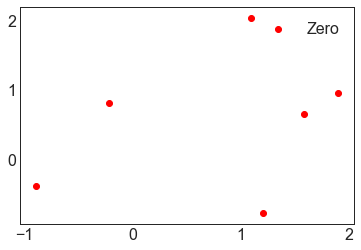

In [68]:
plt.scatter(X[y==0,0],X[y==0,1],c="red",label = "Zero")
plt.legend()

现在我们只需要找到三个因素：
1. 绘图用数据x1和x2<br>
2. 标签的列表<br>
3. 颜色

### 3. 开始认识绘图所需要的数据

In [74]:
#导入数据
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

#探索数据

midwest.shape

midwest.head()

midwest.columns

#给大家翻译了一下：
["城市ID","郡","州","面积","总人口","人口密度","白人人口","非裔人口","美洲印第安人人口","亚洲人口","其他人种人口"
,"白人所占比例","非裔所占比例","美洲印第安人所占比例","亚洲人所占比例","其他人种比例"
,"成年人口","具有高中文凭的比率","大学文凭比例","有工作的人群比例"
,"已知贫困人口","已知贫困人口的比例","贫困线以下的人的比例","贫困线以下的儿童所占比例","贫困的成年人所占的比例","贫困的老年人所占的比例"
,"是否拥有地铁","标签","点的尺寸"]

#看见我们的横纵坐标了吗？

### 4. 准备标签的列表和颜色

#### 标签

In [75]:
midwest['category']

0      AAR
1      LHR
2      AAR
3      ALU
4      AAR
5      AAR
6      LAR
7      AAR
8      AAR
9      AAR
10     AAR
11     LAR
12     LAU
13     AAR
14     AAR
15     AAR
16     HAU
17     AAR
18     AAR
19     AAR
20     AAR
21     AAR
22     AAR
23     AAR
24     LHR
25     AAR
26     LHR
27     AAR
28     ALU
29     LHR
      ... 
302    AAR
303    AAR
304    AAR
305    AAR
306    AAR
307    LHR
308    AAR
309    AAR
310    AAR
311    HLU
312    AAR
313    HAU
314    AAR
315    AAR
316    AAR
317    AAR
318    AAR
319    HLU
320    AAR
321    AHR
322    AAR
323    AAR
324    AAR
325    AAR
326    AAR
327    AAR
328    AAR
329    AAR
330    AAR
331    AAR
Name: category, Length: 332, dtype: object

In [76]:
#提取标签中的类别
categories = np.unique(midwest['category']) #去掉所有重复的项

In [77]:
categories #这就是我们要使用的标签的类别列表

array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR',
       'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

In [78]:
len(categories)

14

#### 颜色

接下来要创造和标签的类别一样多的颜色<br>
如果只有三四个类别，或许我们还可以自己写<br>
然而面对十几个，或者二十个分类，我们需要让matplotlib来帮助我们自动生成颜色

### plt.cm.tab10()

用于创建颜色的十号光谱，在matplotlib中，有众多光谱供我们选择：https://matplotlib.org/tutorials/colors/colormaps.html<br>
我们可以在plt.cm.tab10()中输入任意浮点数，来提取出一种颜色<br>
光谱tab10中总共只有十种颜色，如果输入的浮点数比较接近，会返回类似的颜色<br>
这种颜色会以元祖的形式返回，表示为四个浮点数组成的RGBA色彩空间或者三个浮点数组成的RGB色彩空间中的随机色彩

In [79]:
color1 = plt.cm.tab10(5.2)

In [80]:
color1 #四个浮点数组成的一个颜色

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


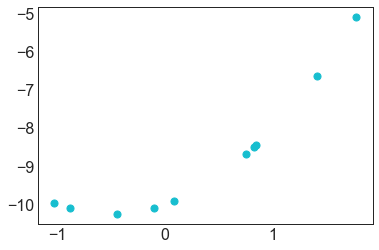

In [81]:
#这个颜色是什么颜色呢？

x1 = np.random.randn(10)           
x2 = x1 + x1**2 - 10
plt.scatter(x1,x2,s=50
            ,c=color1)
plt.show()

In [82]:
#展示除了类似于硫酸铜的蓝绿色，然而报了警告

color1

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)

In [83]:
np.array(color1).reshape(1,-1).shape

(1, 4)

In [84]:
np.array(color1).reshape(1,-1) #reshape：增维，输入(1,-1)是让行上的维度为1，(-1,1)是让列上的维度为1

array([[0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [85]:
np.array(color1).reshape(-1,1)

array([[0.09019608],
       [0.74509804],
       [0.81176471],
       [1.        ]])

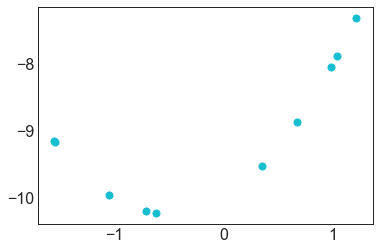

In [86]:
x1 = np.random.randn(10)
x2 = x1 + x1**2 - 10
plt.scatter(x1,x2,s=50
            ,c=np.array(color1).reshape(1,-1))
plt.show()

### 5. 生成基础的图像

In [87]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [88]:
categories[13] #0~13

'LHU'

In [89]:
midwest.loc[midwest["category"] == categories[0],"poptotal"].head()

0    66090
2    14991
4     5836
5    35688
7    16805
Name: poptotal, dtype: int64

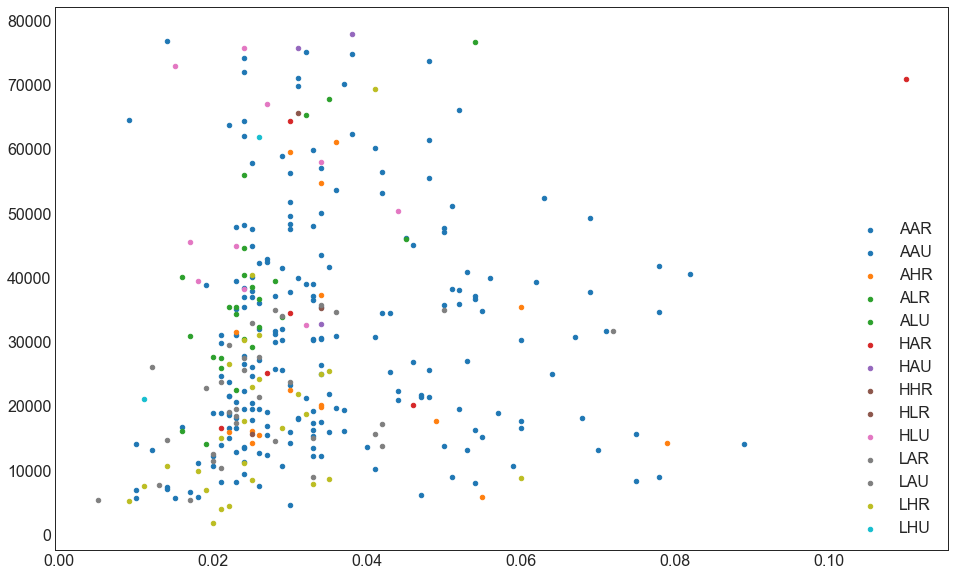

In [90]:
#为了标签的名称，我们本来就需要循环和标签的类别数目一样的次数
#所以需要循环的次数 = 需要生成的颜色的次数 = 需要生成的小数的个数
#只需要在循环中不断生成颜色就好了
#所以我们可以利用循环中的i来生成14个不同的小数

plt.figure(figsize=(16,10))

for i in range(len(categories)):
    plt.scatter(midwest.loc[midwest["category"]==categories[i],"area"]
                ,midwest.loc[midwest["category"]==categories[i],"poptotal"]
                ,s=20
                ,c=np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
                ,label=categories[i]
               )
plt.legend()
plt.show()

In [91]:
#当然了，也可以先创建好一个颜色的列表，然后使用索引来不断地将颜色提取出来

colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#这是一个列表推倒式，其实它表达的内容和循环非常类似:

In [92]:
colors = []
for i in range(len(categories)):
    colors.append(plt.cm.tab10(i/float(len(categories)-1)))

In [93]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

In [94]:
plt.rcParams

C:\Python\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.forma

In [95]:
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

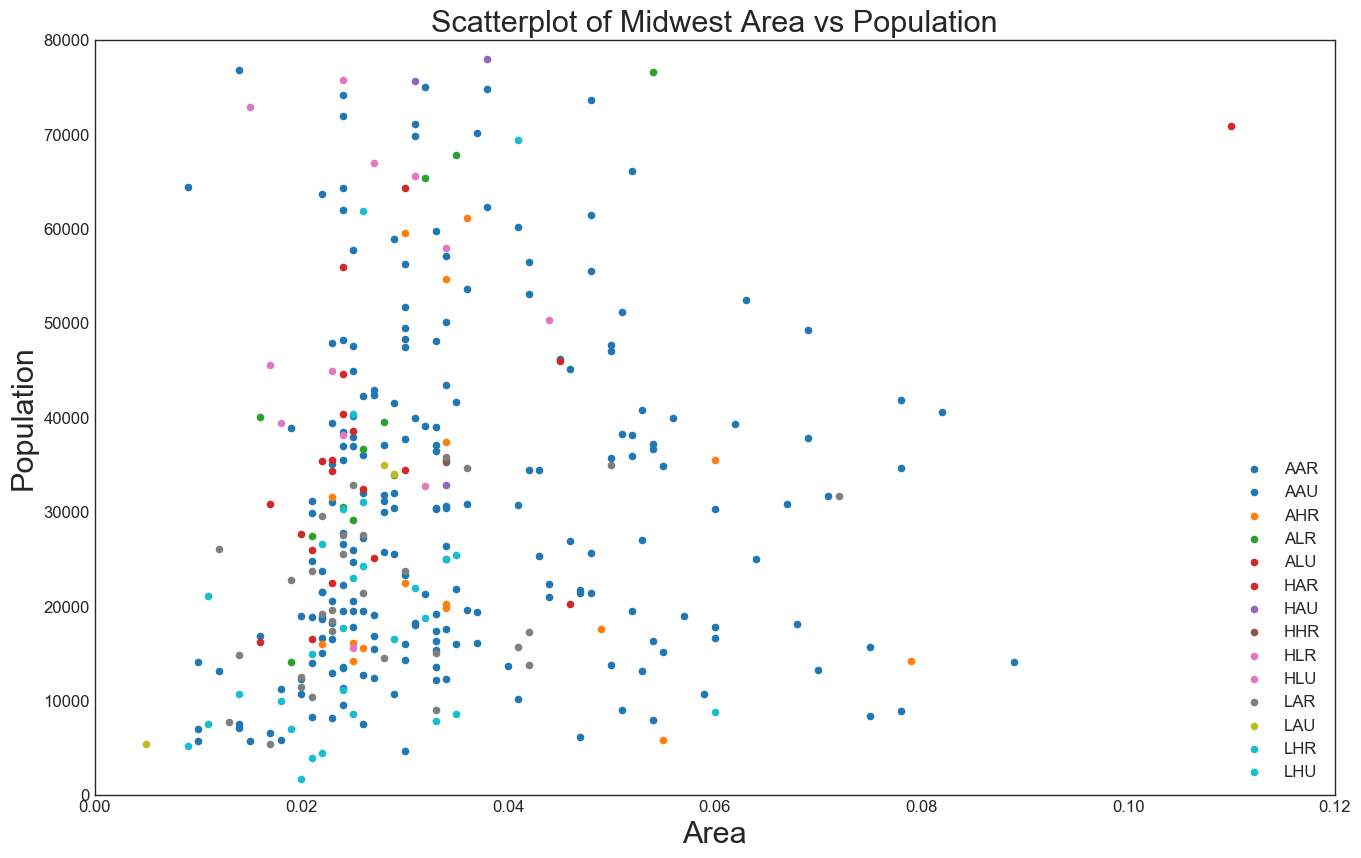

In [97]:
#丰富我们的图像

#预设图像的各种属性
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性
plt.style.use('seaborn-whitegrid') #设定整体风格
sns.set_style("white") #设定整体背景风格

%matplotlib inline

#准备标签列表和颜色列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#建立画布
plt.figure(figsize=(16, 10)   #绘图尺寸
           , dpi=100          #图像分辨率
           , facecolor='w'    #图像的背景颜色，设置为白色，默认也是白色
           , edgecolor='k'    #图像的边框颜色，设置为黑色，默认也是黑色
          )

#循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=np.array(colors[i]).reshape(1,-1), label=str(category))

#注意到这里的数据获取方法和我们刚才写的不同了吗？
#我们不仅可以输入横纵坐标，也可以输入横纵坐标的名字，然后使用data这个参数来传入全数据集
#我们不仅可以循环i，还可以对i和category一同进行循环

#对图像进行装饰
#plt.gca() 获取当前的子图，如果当前没有任何子图的话，就帮我创建一个新的子图
plt.gca().set(xlim=(0, 0.12), ylim=(0, 80000)) #控制横纵坐标的范围
plt.xticks(fontsize=12) #坐标轴上的标尺的字的大小
plt.yticks(fontsize=12)
plt.ylabel('Population',fontsize=22) #坐标轴上的标题和字体大小
plt.xlabel('Area',fontsize=22)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22) #整个图像的标题和字体的大小
plt.legend(fontsize=12) #图例的字体大小
plt.show()

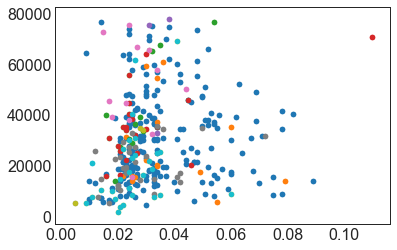

In [98]:
for i in range(len(categories)): #0~13
    plt.scatter(midwest.loc[midwest["category"]==categories[i],"area"]
                ,midwest.loc[midwest["category"]==categories[i],"poptotal"]
                ,s=20
                ,c=np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
                ,label=categories[i]
               )


#循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=np.array(colors[i]).reshape(1,-1), label=str(category))

#注意到这里的数据获取方法和我们刚才写的不同了吗？
#我们不仅可以输入横纵坐标，也可以输入横纵坐标的名字，然后使用data这个参数来传入全数据集
#我们不仅可以循环i，还可以对i和category一同进行循环

In [93]:
[*enumerate(categories)]

[(0, 'AAR'),
 (1, 'AAU'),
 (2, 'AHR'),
 (3, 'ALR'),
 (4, 'ALU'),
 (5, 'HAR'),
 (6, 'HAU'),
 (7, 'HHR'),
 (8, 'HLR'),
 (9, 'HLU'),
 (10, 'LAR'),
 (11, 'LAU'),
 (12, 'LHR'),
 (13, 'LHU')]

In [84]:
midwest["area"].max()

0.11

In [85]:
midwest["area"].min()

0.005

### 6. 解读图像

In [ ]:
#导入数据
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

#探索数据

midwest.shape

midwest.head()

midwest.columns

#给大家翻译了一下：
["城市ID","郡","州","面积","总人口","人口密度","白人人口","非裔人口","美洲印第安人人口","亚洲人口","其他人种人口"
,"白人所占比例","非裔所占比例","美洲印第安人所占比例","亚洲人所占比例","其他人种比例"
,"成年人口","具有高中文凭的比率","大学文凭比例","有工作的人群比例"
,"已知贫困人口","已知贫困人口的比例","贫困线以下的人的比例","贫困线以下的儿童所占比例","贫困的成年人所占的比例","贫困的老年人所占的比例"
,"是否拥有地铁","标签","点的尺寸"]

#看见我们的横纵坐标了吗？

midwest.head()

midwest[midwest["area"] > 0.1]

midwest["category"].value_counts().index[0][2]

midwest["c1"] = midwest["category"].apply(lambda x:x[0])
midwest["c2"] = midwest["category"].apply(lambda x:x[1])
midwest["c3"] = midwest["category"].apply(lambda x:x[2])

midwest.head()

midwest["c1"].value_counts() #average, high, low

midwest["c2"].value_counts()

midwest["c3"].value_counts() #rural, urban

##看到这个结果，我有一个大胆的想法~如何验证我的猜测呢？我们来使用逻辑回归

#先处理数据集，将我们取出来的三列标签转化为数字

from sklearn.preprocessing import OrdinalEncoder as OE
data = midwest.copy()

data.head()

data.iloc[:,-3:].head()

data.iloc[:,-3:] = OE().fit_transform(data.iloc[:,-3:])

data.iloc[:,-3:].head() #average = 0,L=2,H=1

data.info()

data.columns = ["城市ID","郡","州","面积","总人口","人口密度","白人人口","非裔人口","美洲印第安人人口","亚洲人口","其他人种人口"
                   ,"白人所占比例","非裔所占比例","美洲印第安人所占比例","亚洲人所占比例","其他人种比例"
                   ,"成年人口","具有高中文凭的比率","大学文凭比例","有工作的人群比例"
                   ,"已知贫困人口","已知贫困人口的比例","贫困线以下的人的比例","贫困线以下的儿童所占比例","贫困的成年人所占的比例","贫困的老年人所占的比例"
                   ,"是否拥有地铁","标签","点的尺寸","c1","c2","c3"]

#去掉所有类型为"object"的列，都是无用的信息
data = data.loc[:,data.dtypes.values != "O"]

data.loc[:,data.dtypes.values == "int64"] = data.loc[:,data.dtypes.values == "int64"]*1.0

data.info()

X = data.iloc[:,1:-3] #除了对象类的列，还有城市编号也是无用的信息，因此我们不把它作为特征矩阵的一部分
X.head()

y = data.iloc[:,-3:]
y.head()

#然后分训练集和测试集

from sklearn.model_selection import train_test_split as TTS
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=420)

Xtrain.head()

range(Xtrain.shape[0])

#恢复索引
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

Xtrain.head()

[*range(23),-1]

Xtrain.iloc[:,[*range(23),-1]].head()

#标准化数据集
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(Xtrain.iloc[:,[*range(23),-1]]) #以训练集为标准的均值和方差

Xtrain_ = Xtrain.copy()
Xtest_ = Xtest.copy()

Xtrain_.iloc[:,[*range(23),-1]] = ss.transform(Xtrain.iloc[:,[*range(23),-1]])
Xtest_.iloc[:,[*range(23),-1]] = ss.transform(Xtest.iloc[:,[*range(23),-1]])

Xtrain_.head()

Ytrain.iloc[:,2]

Ytrain.columns[0]

#使用逻辑回归探索数据集
from sklearn.linear_model import LogisticRegression as logiR
import pandas as pd

for i in range(3): #三次建模，每次建模的y不同
    logi = logiR(solver="newton-cg",max_iter=100**20,multi_class="multinomial").fit(Xtrain_,Ytrain.iloc[:,i].ravel())
    print(y.columns[i])
    print("\tTrain:{}".format(logi.score(Xtrain_,Ytrain.iloc[:,i].ravel()))) #模型的学习能力
    print("\tTest:{}".format(logi.score(Xtest_,Ytest.iloc[:,i].ravel()))) #模型的泛化能力
    coeff = pd.DataFrame(logi.coef_).T
    if i != 2:
        coeff["mean"] = abs(coeff).mean(axis=1)
        coeff["name"] = Xtrain.columns
        coeff.columns = ["Average","High","Low","mean","name"]
        coeff = coeff.sort_values(by="mean",ascending=False).head()
    else:
        coeff["name"] = Xtrain.columns
        coeff.columns = ["Coef","name"]
        coeff = coeff.sort_values(by="Coef",ascending=False).head()
    print(coeff)
    print("\t")

logi = logiR(solver="newton-cg",max_iter=100**20,multi_class="multinomial").fit(Xtrain_,Ytrain.iloc[:,0].ravel())
print(y.columns[0])
print("\tTrain:{}".format(logi.score(Xtrain_,Ytrain.iloc[:,0].ravel()))) #模型的学习能力，以准确率来衡量
print("\tTest:{}".format(logi.score(Xtest_,Ytest.iloc[:,0].ravel()))) #模型的泛化能力

logi.coef_.shape #3对应的是我们的三分类（A,H,L），25对应的是25个特征 ovo AvsH, AvsL, HvsL

coeff = pd.DataFrame(logi.coef_).T #每行是我们的特征，每列是我们三分类对应的三个系数

coeff

coeff["mean"] = abs(coeff).mean(axis=1)

coeff["name"] = Xtrain.columns #特征的名字

coeff.columns = ["Average","High","Low","mean","name"]

print(coeff.sort_values(by="mean",ascending=False).head())

#结论：第一个字母是平均教育程度的高低(越高的话，我们的标签就是H)
#第二个字母是贫困水平的高低（越穷的话，我们的水平就是H）
#第三个字母是城市还是乡村
#基于这个结论，我们对于图可以分析出什么呢？

In [275]:
midwest["category"].value_counts()

AAR    186
LAR     30
LHR     27
AAU     21
AHR     16
ALU     14
ALR     11
HLU     10
HAR      6
LAU      3
HAU      3
HLR      2
LHU      2
HHR      1
Name: category, dtype: int64

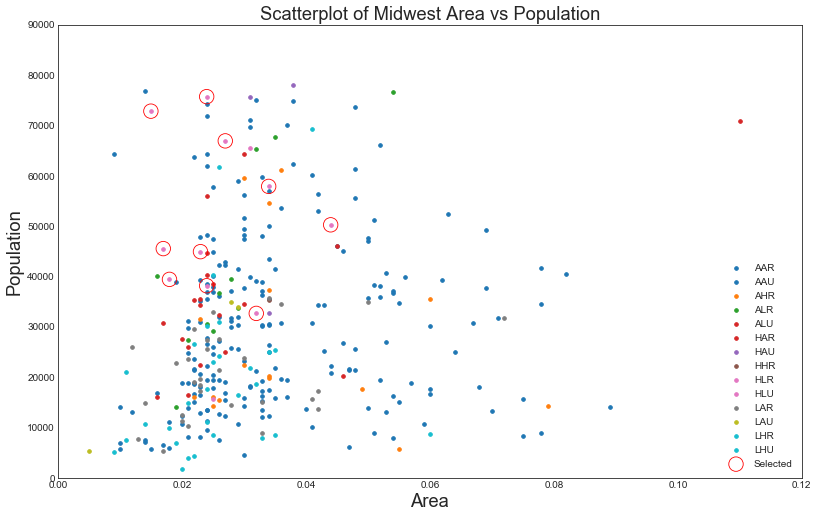

In [280]:
plt.figure(figsize=(16, 10)   #绘图尺寸
           , dpi=60           #图像分辨率
           , facecolor='w'    #图像的背景颜色，设置为白色，默认也是白色
           , edgecolor='k'    #图像的边框颜色，设置为黑色，默认也是黑色
          )

#进行循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :],
                s=20, c=np.array(plt.cm.tab10(i/float(len(categories)-1))).reshape(1,-1),label=str(category))

#高学历，低贫困的地方
plt.scatter("area","poptotal",
           data = midwest.loc[midwest.category == "HLU",:],
            s=300,
            facecolors="None",
            edgecolors="red",
            label = "Selected")

#低学历，很贫困的地方
#plt.scatter("area","poptotal",
#           data = midwest.loc[midwest.category == "LHR",:],
#            s=150,
#            facecolors="None", #点的填充颜色，为None的时候，表示点是透明的
#            edgecolors="red", #点的边框现在是红色
#           label = "Selected")

#再试试看，高学历，高贫困的地方？
#学历低，但很富有的地方？

#对图像进行装饰
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 90000)) #控制横纵坐标的范围
plt.xticks(fontsize=12) #坐标轴上的标尺的字的大小
plt.yticks(fontsize=12)
plt.ylabel('Population',fontsize=22) #坐标轴上的标题和字体大小
plt.xlabel('Area',fontsize=22)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22) #整个图像的标题和字体的大小
plt.legend(fontsize=12) #图例的字体大小
plt.show()

In [ ]:
#还可以从标签中观察出什么？

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

#### 02/50 气泡图

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/02%20%E6%B0%94%E6%B3%A1%E5%9B%BE3.PNG" align="center" />

横坐标依然是面积，纵坐标依然是人口<br>
从01号图散点图的数据解读来看，其实为散点添加不同的颜色是增加图像中的信息维度<br>
而气泡图其实也是一样：通过给散点增加面积信息，来增加图像中的信息维度

### 1. 变散点为气泡

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

In [4]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [5]:
midwest.columns

Index(['PID', 'county', 'state', 'area', 'poptotal', 'popdensity', 'popwhite',
       'popblack', 'popamerindian', 'popasian', 'popother', 'percwhite',
       'percblack', 'percamerindan', 'percasian', 'percother', 'popadults',
       'perchsd', 'percollege', 'percprof', 'poppovertyknown',
       'percpovertyknown', 'percbelowpoverty', 'percchildbelowpovert',
       'percadultpoverty', 'percelderlypoverty', 'inmetro', 'category',
       'dot_size'],
      dtype='object')

In [6]:
midwest.popasian.max()

2178

In [7]:
midwest.popasian.min()

0

In [8]:
midwest.percasian.min()

0.0

In [9]:
midwest.percasian.max()

3.56657442

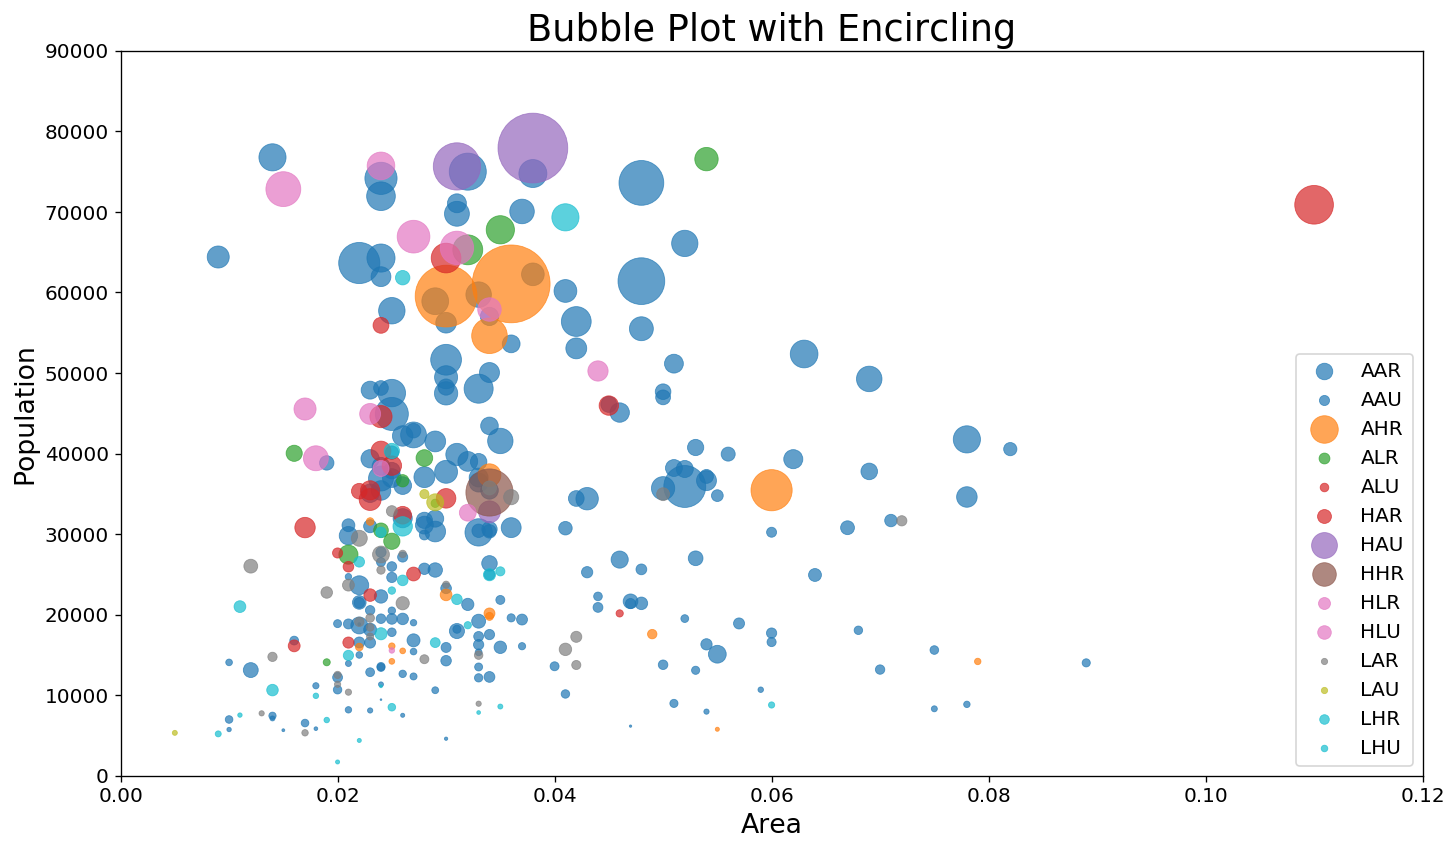

In [11]:
#plt.style.use('seaborn-whitegrid')
#sns.set_style("white")

#预设图像的各种属性
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性
#plt.style.use('seaborn-whitegrid') #设定整体风格
#sns.set_style("white") #设定整体背景风格

%matplotlib inline

#准备标签列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#布置画布
fig = plt.figure(figsize=(14,8), dpi=120, facecolor='w', edgecolor='k')    

#循环绘图
#之前在给散点加入颜色的时候，我们提到X轴，Y轴上的值和我们的颜色是一一对应的
#那只要点的尺寸和我们的坐标点(x1,x2)一一对应，那我们就可以相应地给每一个点添加尺寸信息
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :]
                #, s = midwest.loc[midwest.category==category, "percasian"]*500 #调整尺寸，让散点图成为气泡图
                , s = "popasian" #现在的特征为我们的点的尺寸大小
                #, s=20 #size
                , c= np.array(colors[i]).reshape(1,-1)
                , label=str(category)
                , edgecolors = np.array(colors[i]).reshape(1,-1) #点的边缘的颜色
                #, edgecolors="k"
                , alpha = 0.7 #图像的透明度
                , linewidths=0.5 #点的外圈的线条的宽度
               )

#装饰图像
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12
           ,markerscale=0.5 #现有的图例气泡的某个比例
          )
plt.show()

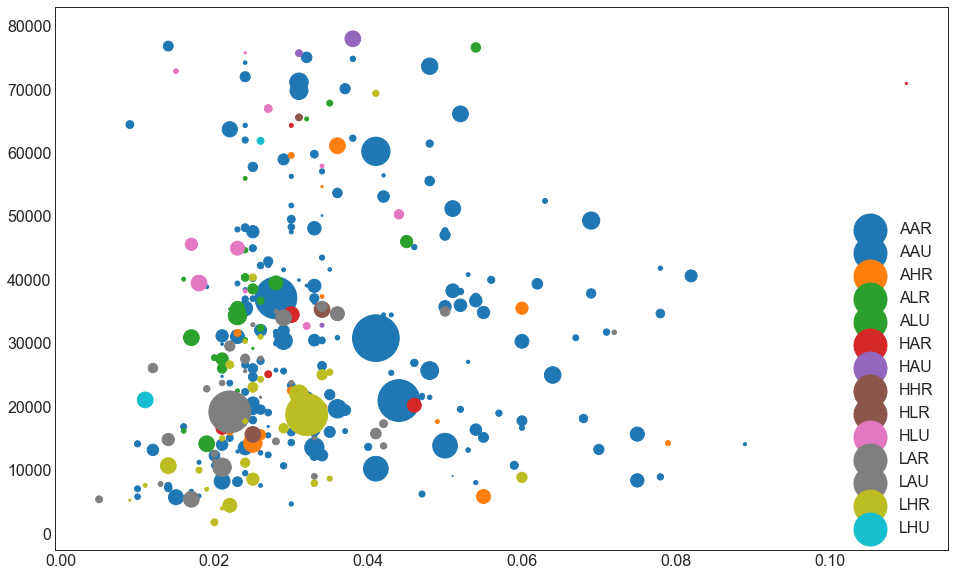

In [334]:
#如果使用另外一种循环？
plt.figure(figsize=(16,10))

for i in range(len(categories)):
    plt.scatter(midwest.loc[midwest["category"]==categories[i],"area"]
                ,midwest.loc[midwest["category"]==categories[i],"poptotal"]
                ,s=midwest.loc[:,"popasian"]
                ,c=np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
                ,label=categories[i]
               )
plt.legend()
plt.show()

In [336]:
midwest.loc[midwest["category"]==categories[0],"area"].shape

(186,)

In [337]:
midwest.loc[midwest["category"]==categories[0],"popasian"].shape

(186,)

In [338]:
midwest.loc[:,"popasian"].shape #参数s里面可以输入和我们的坐标点长度不一致的序列

(332,)

*参数s中可能出现的陷阱*

In [3]:
X = np.arange(0,10,1) #10行

In [4]:
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
y = [0,0,0,0,0,1,1,1,1,1]

In [14]:
#sizes1 = [50,50,50,50,50,100,100,100,100,100]
#sizes2 = [50,50,50,50,50,100,100,100,100,100,200,200,200]
#sizes2 = [50,50,50,50,50,100,100,200,200,200,100,100,100]
sizes2 = [50,100,200]

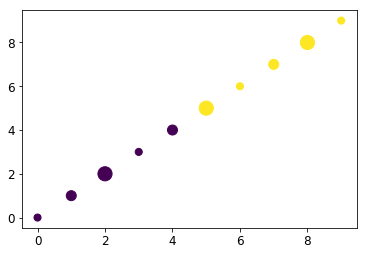

In [27]:
plt.scatter(X,X #横坐标，纵坐标
            #,s=sizes1
            ,s=sizes2 #如果输入了比原始数据更加长的序列，则我们的参数只会截取到和横坐标/纵坐标一样长的对应的尺寸
            ,c=y
           )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
#你发现了什么？

*气泡图中的图例相关问题*

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E5%88%AB%E4%BA%BA%E5%AE%B6%E7%9A%84%E6%B0%94%E6%B3%A1%E5%9B%BE1111.PNG" align="center" />

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E5%88%AB%E4%BA%BA%E5%AE%B6%E7%9A%84%E6%B0%94%E6%B3%A1%E5%9B%BE2222.PNG" align="center" />

In [12]:
X = np.arange(0,10,1)

In [15]:
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(3.1, 3.1, 'ha')

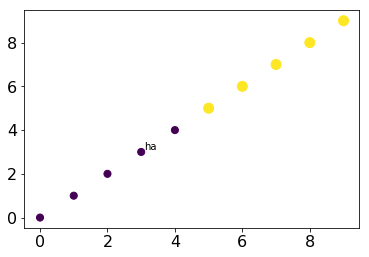

In [32]:
y = [0,0,0,0,0,1,1,1,1,1]
sizes1 = [50,50,50,50,50,100,100,100,100,100]

plt.scatter(X,X #横坐标，纵坐标
            ,s=sizes1
            ,c=y
           )
plt.text(X[3]+0.1,X[3]+0.1
        #,s=["ha","ha","ha","ha","ha","hei","hei","hei","hei","hei"] #不是size的s，而是我们的字符串string的简称s
        ,s="ha"
        )

In [ ]:
#我们可以让尺寸一一与坐标点对应，但是却无法让坐标点的名字一一与坐标点对应
#这就有点像图例必须进行循环一样，给每一个气泡添加名字，也必须在每个气泡上进行循环

In [36]:
midwest.county

0            ADAMS
1        ALEXANDER
2             BOND
3            BOONE
4            BROWN
5           BUREAU
6          CALHOUN
7          CARROLL
8             CASS
9        CHRISTIAN
10           CLARK
11            CLAY
12         CLINTON
13           COLES
14        CRAWFORD
15      CUMBERLAND
16         DE KALB
17         DE WITT
18         DOUGLAS
19           EDGAR
20         EDWARDS
21       EFFINGHAM
22         FAYETTE
23            FORD
24        FRANKLIN
25          FULTON
26        GALLATIN
27          GREENE
28          GRUNDY
29        HAMILTON
          ...     
302      LAFAYETTE
303       LANGLADE
304        LINCOLN
305      MARINETTE
306      MARQUETTE
307      MENOMINEE
308         MONROE
309         OCONTO
310         ONEIDA
311        OZAUKEE
312          PEPIN
313         PIERCE
314           POLK
315        PORTAGE
316          PRICE
317       RICHLAND
318           RUSK
319       ST CROIX
320           SAUK
321         SAWYER
322        SHAWANO
323         

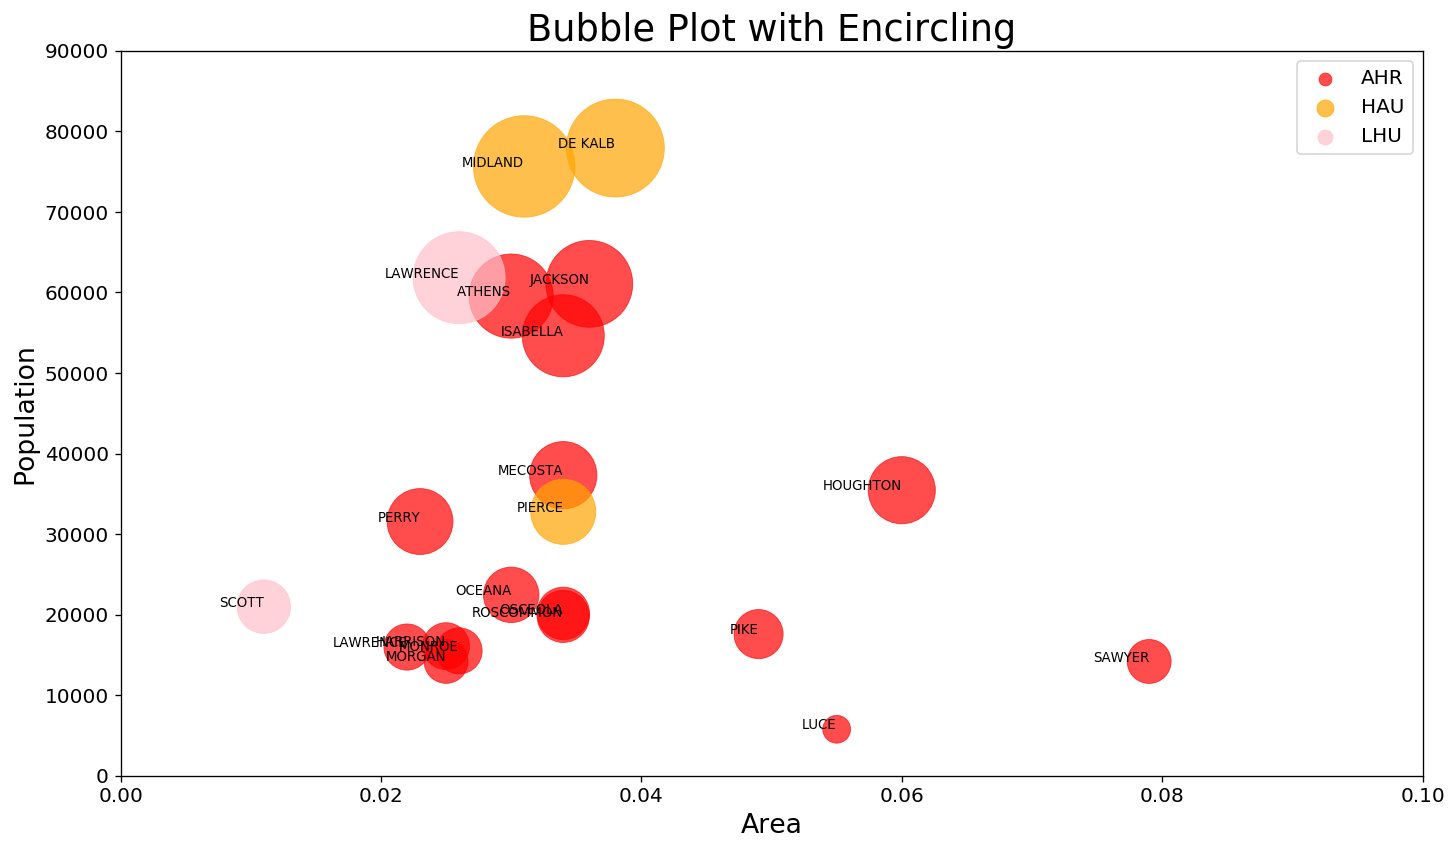

In [47]:
#plt.style.use('seaborn-whitegrid')
#sns.set_style("white")

#预设图像的各种属性
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性
#plt.style.use('seaborn-whitegrid') #设定整体风格
#sns.set_style("white") #设定整体背景风格

%matplotlib inline

#准备标签列表
categories = np.unique(midwest['category'])
colors = ["red","orange","pink"]

#布置画布
fig = plt.figure(figsize=(14,8), dpi=120, facecolor='w', edgecolor='k')    

#循环绘图
for i, category in enumerate(["AHR","HAU","LHU"]):
    data_ = midwest.loc[midwest.category==category, :]
    data_.index = range(data_.shape[0])
    plt.scatter('area', 'poptotal', data=data_
                , s= midwest.loc[midwest.category==category, "poppovertyknown"]*0.05 #调整尺寸，让散点图成为气泡图
                , c= colors[i]
                , label=str(category)
                , edgecolors= colors[i]
                , alpha = 0.7
                , linewidths=.5
               )
    for i in range(midwest.loc[midwest.category==category, :].shape[0]):
        plt.text(data_.loc[i,"area"]
                 ,data_.loc[i,"poptotal"]
                 ,s=data_.loc[i,"county"] #虽然参数都写作s，但这里的s指的是字符串string的s，不是size的s
                 ,fontdict={"fontsize":8} #调整我们的字符串的字体大小
                 ,horizontalalignment='right' #相对于我的气泡，把我的字符串显示在哪里
                )
        
#装饰图像
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
lgnd = plt.legend(fontsize=12
                  ,markerscale=0.2
                 )
plt.show()

In [ ]:
#解读图像：试试看输入不同的s的值，会得出什么结论呢？

### 2. 将散点框起来

什么时候会存在这样的需求呢？来看一组数据：

In [52]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1) #随机模式1号

#random.randn 取出符合标准正态分布的随机数
#random.normal 取出符合正态分布的随机数
x1, y1 = np.random.normal(loc=5 #正态分布中的均值
                          , scale=2 #正态分布中的方差
                          , size=(2,15) #生成怎样的数据结构，2列，每列15个数据
                         )

In [53]:
x1.shape

(15,)

In [54]:
y1.shape

(15,)

In [57]:
x2, y2 = np.random.normal(loc=8
                          , scale=2.5
                          , size=(2,13))

In [58]:
x2.shape

(13,)

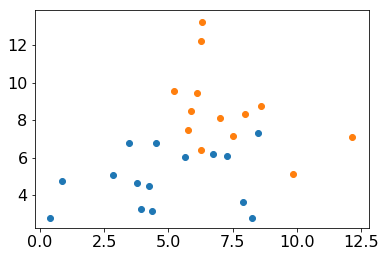

In [59]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

我们希望能够绘制一个边界，将同一类的点框起来。<br>
在这里我们将用到SciPy库，这是一个专为Python设计的，专注于数学&工程学的库<br>
今天我们将用到SciPy中专门处理空间算法和数据结构的模块：SciPy库中的spatial

### **scipy.spatial.ConvexHull()**

ConvexHull直译是凸包，表示在一个平面上，我们能找到的最小的将一组数据全部包括在内的凸集<br>
通俗的来说凸包就是包围一组散点的最小凸边形<br>
相对的我们也有凹边形

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E5%87%B8%E5%8C%85%20vs%20%E5%87%B9%E5%8C%85.PNG" align="center" />

类**ConvexHull**能够帮助我们创建N维凸包<br>
> **重要参数**
>> **points**：浮点数组成的n维数组，结构为(点的个数，维度)。表示用来构成凸包的坐标点。<br>
>> **incremental**：布尔值，可不填。允许不断向类中添加新的数据点。<br>

> **重要属性**<br>
>> **vertices**：组成凸包的那些数据点在原数据中的索引

*更多参数和属性走：https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.spatial.ConvexHull.html

In [69]:
from scipy.spatial import ConvexHull
from matplotlib import patches
#patches，给现有图像打补丁的包，在现有的图像上增加更多的东西

In [76]:
#定义绘制凸包的函数
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca() #获取当前子图，如果当前子图不存在，那就创建新的子图(get current ax)
    p = np.c_[x,y] #.c_功能类似于zip，不过不是生成组合的元祖，而是生成拼接起来的数组array
    hull = ConvexHull(p) #将数据集输入到ConvexHull中，自动生成凸包类型的对象
    poly = plt.Polygon(p[hull.vertices,:], **kw)
        #使用属性vertices调用形成凸包的点的索引，进行切片后，利用绘制多边形的类plt.Polygon将形成凸包的点连起来
        #这里的**kw就是定义函数的时候输入的**kw，里面包含了一系列可以在绘制多边形的类中进行调节的内容
        #包括多边形的边框颜色，填充颜色，透明度等等
    ax.add_patch(poly) #使用add_patch，将生成的多边形作为一个补丁补充到图像上

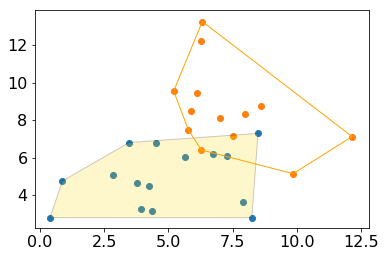

In [80]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)

encircle(x1, y1
         , ec="k" #线条的颜色
         , fc="gold" #多边形的颜色
         , alpha=0.2 #图像整体的透明度
        )
#你是否注意到，边框也是透明的？

encircle(x2, y2, ec="orange", fc="none")

plt.show()

In [60]:
x1

array([8.24869073, 3.77648717, 3.9436565 , 2.85406276, 6.73081526,
       0.39692261, 8.48962353, 3.4775862 , 5.63807819, 4.50125925,
       7.92421587, 0.87971858, 4.35516559, 4.23189129, 7.26753888])

In [61]:
y1

array([2.80021747, 4.65514358, 3.24428316, 5.08442749, 6.16563043,
       2.79876165, 7.28944742, 6.80318144, 6.00498868, 6.8017119 ,
       3.63254428, 4.75421955, 3.12846113, 4.46422384, 6.06071093])

In [63]:
[*zip(x1,y1)]

[(8.248690727326483, 2.8002174653719383),
 (3.7764871726998495, 4.655143584899129),
 (3.9436564954730886, 3.2442831641572565),
 (2.854062755687659, 5.0844274934311855),
 (6.730815258649357, 6.165630427431644),
 (0.39692260623943465, 2.7987616455741575),
 (8.48962352843296, 7.289447419679228),
 (3.4775861982097944, 6.8031814411855915),
 (5.638078192114197, 6.004988677803737),
 (4.50125924904518, 6.801711898528824),
 (7.924215874089948, 3.6325442816513336),
 (0.8797185810046919, 4.754219548962704),
 (4.355165591972985, 3.1284611314818624),
 (4.231891290663169, 4.464223840747968),
 (7.267538884670875, 6.060710933476372)]

In [64]:
p = np.c_[x1,y1] #将两组数据组合起来 zip函数

In [65]:
p #代表了所有的15个点的坐标

array([[8.24869073, 2.80021747],
       [3.77648717, 4.65514358],
       [3.9436565 , 3.24428316],
       [2.85406276, 5.08442749],
       [6.73081526, 6.16563043],
       [0.39692261, 2.79876165],
       [8.48962353, 7.28944742],
       [3.4775862 , 6.80318144],
       [5.63807819, 6.00498868],
       [4.50125925, 6.8017119 ],
       [7.92421587, 3.63254428],
       [0.87971858, 4.75421955],
       [4.35516559, 3.12846113],
       [4.23189129, 4.46422384],
       [7.26753888, 6.06071093]])

In [70]:
hull = ConvexHull(p)

In [71]:
hull

In [72]:
hull.vertices

array([ 5,  0,  6,  7, 11], dtype=int32)

In [75]:
p[hull.vertices]

array([[0.39692261, 2.79876165],
       [8.24869073, 2.80021747],
       [8.48962353, 7.28944742],
       [3.4775862 , 6.80318144],
       [0.87971858, 4.75421955]])

在计算机视觉技术当中，我们经常需要利用凸包，以帮助计算机识别图像的轮廓：

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/%E5%87%B8.PNG" align="center" />

In [ ]:
#来看我们原始的绘图

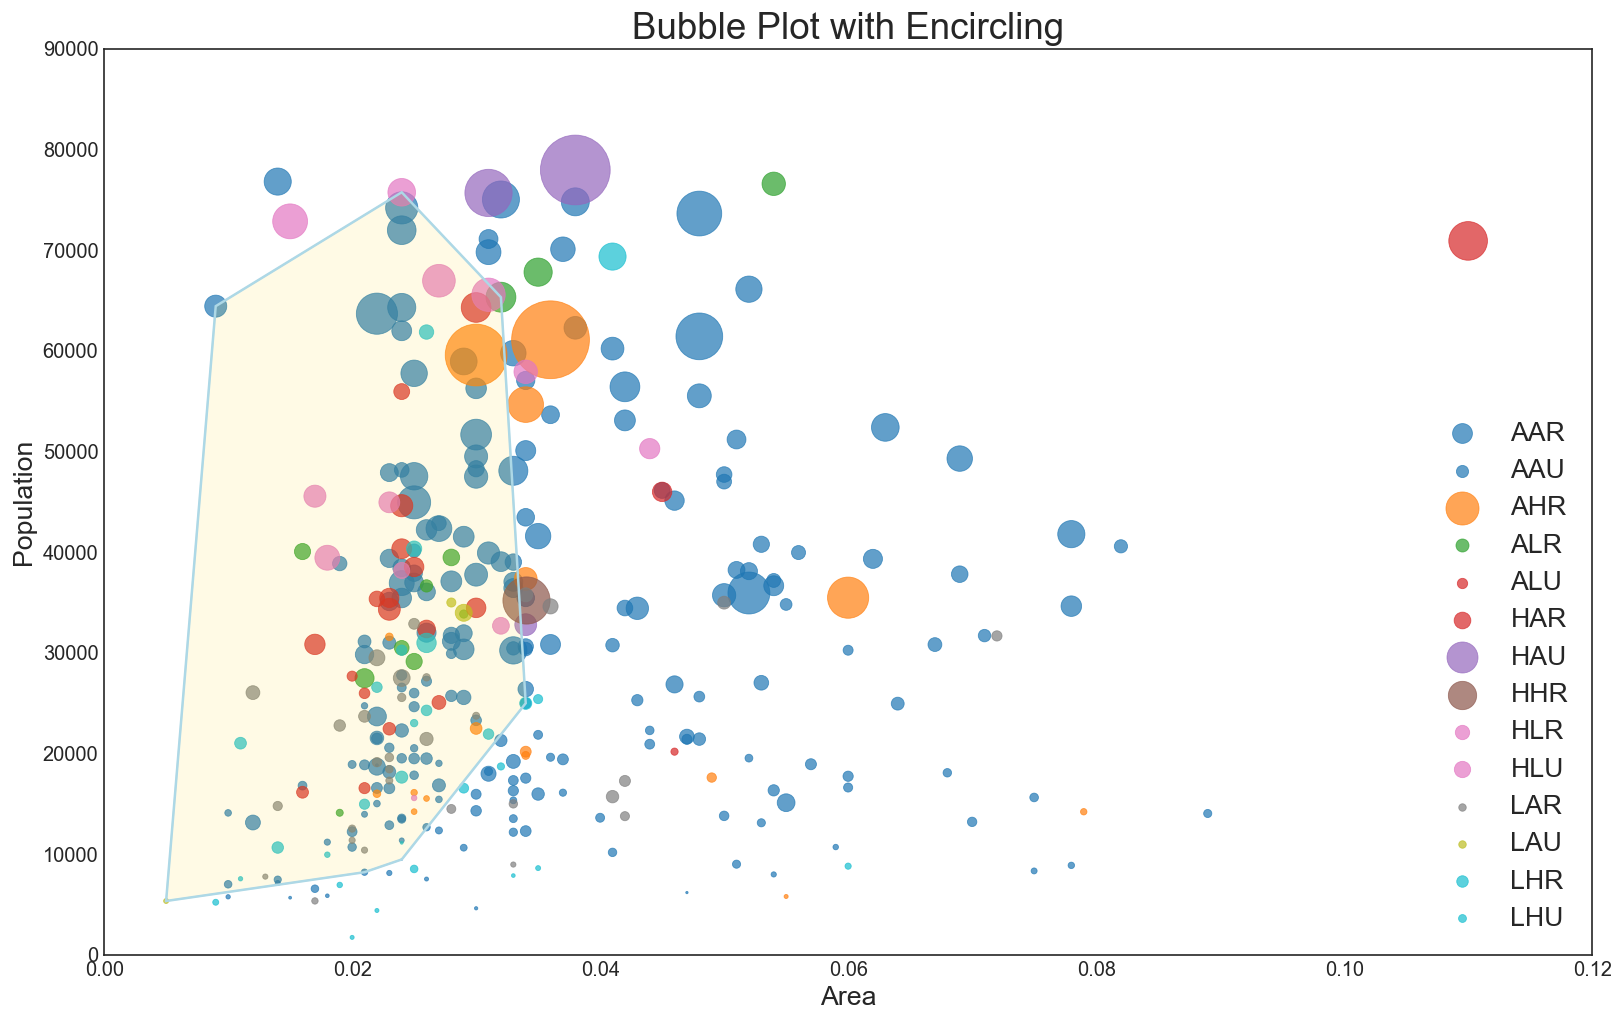

In [84]:
from scipy.spatial import ConvexHull
from matplotlib import patches

plt.style.use('seaborn-whitegrid')
sns.set_style("white")

#预设图像的各种属性
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, #子图上的标题字体大小
          'legend.fontsize': med, #图例的字体大小
          'figure.figsize': (16, 10), #图像的画布大小
          'axes.labelsize': med, #标签的字体大小
          'xtick.labelsize': med, #x轴上的标尺的字体大小
          'ytick.labelsize': med, #y轴上的标尺的字体大小
          'figure.titlesize': large} #整个画布的标题字体大小
plt.rcParams.update(params) #设定各种各样的默认属性
plt.style.use('seaborn-whitegrid') #设定整体风格
sns.set_style("white") #设定整体背景风格

%matplotlib inline

#准备标签列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#布置画布
fig = plt.figure(figsize=(16, 10), dpi=120, facecolor='w', edgecolor='k')    

#循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :]
                , s="popasian" #调整尺寸，让散点图成为气泡图
                , c= np.array(colors[i]).reshape(1,-1)
                , label=str(category)
                , edgecolors= np.array(colors[i]).reshape(1,-1)
                , alpha = 0.7
                , linewidths=.5)

#绘制凸包

#定义函数
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

#定义需要被框起来的数据：所有在IN州中的城市
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                  

#使用函数绘制

#这里绘制的是金色的面
encircle(midwest_encircle_data.area
         , midwest_encircle_data.poptotal
         , ec="k"
         , fc="gold"
         , alpha=0.1
        ) 

#这里绘制的是浅蓝色的线，而面是透明的
encircle(midwest_encircle_data.area
         , midwest_encircle_data.poptotal
         , ec="lightblue" #线条颜色
         , fc="none" #填充颜色
         , linewidth=1.5 #线宽
        )
        
#装饰图像
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(markerscale=0.6)
plt.show()

### 3. 图像解读

In [ ]:
#从图像中可以看出什么呢？